In [1]:
# Importing necessary libraries
import pandas as pd # For handling data operations
import matplotlib.pyplot as plt # For visualizations

# Loading the dataset into a DataFrame
file_path = "NI_hourly.csv"  
df = pd.read_csv(file_path, parse_dates=['Datetime'])  # Reads CSV & parse dates

# Display first few rows to check the data structure
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics to understand numerical data
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
             Datetime   NI_MW
0 2004-12-31 01:00:00  9810.0
1 2004-12-31 02:00:00  9001.0
2 2004-12-31 03:00:00  8509.0
3 2004-12-31 04:00:00  8278.0
4 2004-12-31 05:00:00  8089.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58450 entries, 0 to 58449
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  58450 non-null  datetime64[ns]
 1   NI_MW     58450 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 913.4 KB
None

Summary Statistics:
                            Datetime         NI_MW
count                          58450  58450.000000
mean   2007-08-31 23:47:25.632164096  11701.682943
min              2004-05-01 01:00:00   7003.000000
25%              2005-12-31 00:15:00   9954.000000
50%              2007-08-31 23:30:00  11521.000000
75%              2009-05-01 23:45:00  12896.750000
max              2011-01-01 00:00:00  23

In [2]:
# Extract useful time-based features from Datetime
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Display the first few rows to confirm new columns
print("First 5 rows with new time features:")
print(df.head())

# Check unique values in each time-related column
print("\nUnique values for Year, Month, Day, Hour, DayOfWeek:")
print(df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].nunique())


First 5 rows with new time features:
             Datetime   NI_MW  Year  Month  Day  Hour  DayOfWeek
0 2004-12-31 01:00:00  9810.0  2004     12   31     1          4
1 2004-12-31 02:00:00  9001.0  2004     12   31     2          4
2 2004-12-31 03:00:00  8509.0  2004     12   31     3          4
3 2004-12-31 04:00:00  8278.0  2004     12   31     4          4
4 2004-12-31 05:00:00  8089.0  2004     12   31     5          4

Unique values for Year, Month, Day, Hour, DayOfWeek:
Year          8
Month        12
Day          31
Hour         24
DayOfWeek     7
dtype: int64


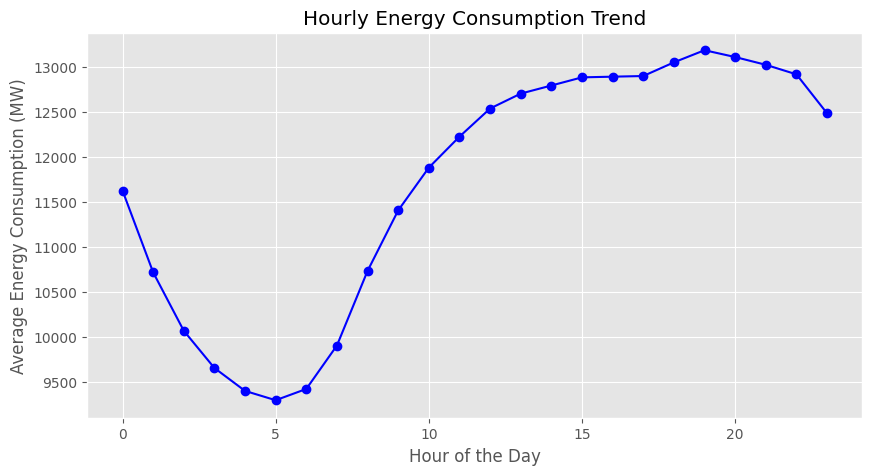

In [3]:
# Setting the plot style
plt.style.use("ggplot")

#1. Showing Hourly Trend: Average Energy Consumption Per Hour
plt.figure(figsize=(10, 5))
hourly_avg = df.groupby("Hour")["NI_MW"].mean()
plt.plot(hourly_avg.index, hourly_avg.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Energy Consumption (MW)")
plt.title("Hourly Energy Consumption Trend")
plt.grid(True)
plt.show()

## **1️. Hourly Energy Consumption Trend**
### Key Findings:
- Energy consumption **drops significantly between 1 AM - 6 AM**, reaching the lowest point around **5 AM**.
- **After 6 AM, demand steadily rises**, peaking around **6 PM - 8 PM**.
- There is a **slight decline after 9 PM**, but demand remains relatively high.

### Assumptions:
- The drop in energy usage during early morning hours makes sense since most people are asleep.
- The **sharp increase in demand after sunrise** could be due to morning activities (residential, commercial, and industrial usage ramping up).
- The **peak in the evening** likely reflects people returning home, businesses still running, and overall high electricity demand.

---

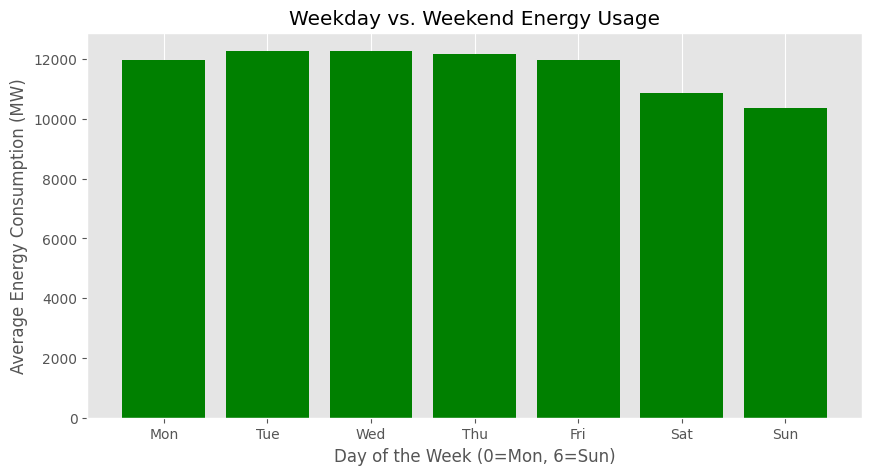

In [4]:
# 2. Showing Daily Trend: Average Energy Consumption Per Day of the Week
plt.figure(figsize=(10, 5))
daily_avg = df.groupby("DayOfWeek")["NI_MW"].mean()
plt.bar(daily_avg.index, daily_avg.values, color="g")
plt.xlabel("Day of the Week (0=Mon, 6=Sun)")
plt.ylabel("Average Energy Consumption (MW)")
plt.title("Weekday vs. Weekend Energy Usage")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(axis="y")
plt.show()


## **2. Weekday vs. Weekend Energy Usage**
### Key Findings:
- **Weekdays (Mon-Fri) have consistently higher energy consumption** than weekends.
- **Saturday and Sunday show a clear drop in energy usage**, with Sunday being the lowest.

### Assumptions:
- This suggests that **commercial and industrial energy usage contributes significantly** to overall demand.
- On weekends, businesses may be closed or operating at lower capacity, leading to reduced electricity consumption.

---

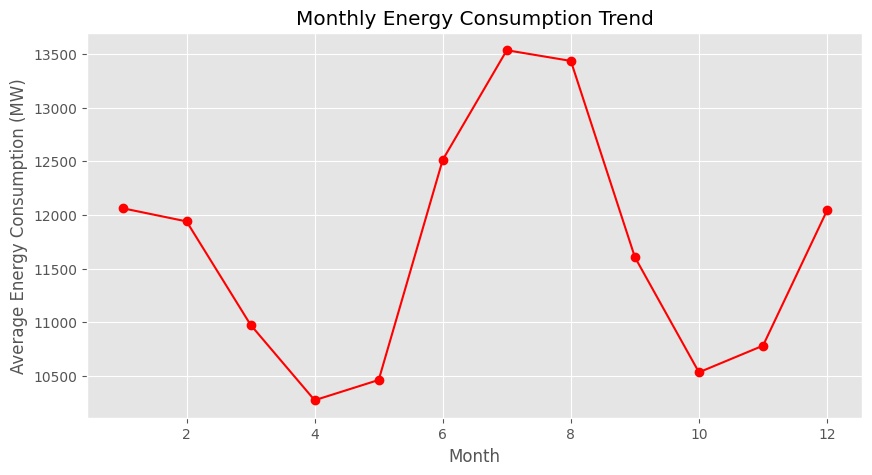

In [5]:
# 3. Showing Monthly Trend: Average Energy Consumption Per Month
plt.figure(figsize=(10, 5))
monthly_avg = df.groupby("Month")["NI_MW"].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker="o", linestyle="-", color="r")
plt.xlabel("Month")
plt.ylabel("Average Energy Consumption (MW)")
plt.title("Monthly Energy Consumption Trend")
plt.grid(True)
plt.show()

## **3️. Monthly Energy Consumption Trend**
### Key Findings:
- **Lowest consumption occurs around April-May & October-November.**
- **Highest consumption occurs during June-July and December-January.**

### Assumptions:
- The **spikes in winter (Dec-Jan) and summer (June-July)** could be due to extreme temperatures:
  - **Winter → Increased heating demands (electric heaters, HVAC systems).**
  - **Summer → Higher air conditioning usage.**
- The **dip in April-May and October-November** suggests these months have **milder weather**, reducing the need for heating/cooling.

---

In [6]:
# Save the cleaned dataset
export_path = "NI_hourly_cleaned.csv"
df.to_csv(export_path, index=False)


## **Next Step: Building an Interactive Power BI Dashboard**
Now that I have strong **insights**, I can build a **professional dashboard** in Power BI that includes:
✔ **Key trends (Hourly, Daily, Monthly) in an interactive format**  
✔ **Filters for different time periods (Year, Month, Day, Hour)**  
✔ **Summary insights for decision-making**  

---
